# Отчет по лабораторной работе № 3 "Регрессионный анализ данных"


# ФИО: Яканин Андрей Владимирович
# Группа: 18-ИВТ-3
# Вариант №20(Набор данных №5)

## Цель лабораторной работы – получение навыков работы с методами регрессии
### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
### 6.	Заполните пропущенные значения в данных;
### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт):

### Data - дата время год-месяц-день час: минута: секунда
### Appliances - бытовая техника, энергопотребление в Ватт/час
### Lights - Свет, использование энергии осветительных приборов в доме в Ватт/час
### T1 - температура в кухонной зоне, в градусах Цельсия
### RH_1 - влажность воздуха в кухонной зоне, в %
### T2 - температура в гостиной, в градусах Цельсия
### RH_2 - влажность в гостиной, в %
### T3 - температура в прачечной
### RH_3 - влажность в прачечной, в %
### T4 - температура в офисном помещении, в градусах Цельсия
### RH_4 - влажность воздуха в офисном помещении, в %
### T5 - температура в ванной комнате, в градусах Цельсия
### RH_5 - влажность в ванной комнате, в %
### T6 - температура снаружи здания (северная сторона), в градусах Цельсия
### RH_6 - влажность снаружи здания (северная сторона), в %
### T7 - температура в гладильной комнате, в градусах Цельсия
### RH_7 - влажность в гладильной комнате, в %
### T8 -  температура в комнате подростка 2, в градусах Цельсия
### RH_8 - влажность в пкомнате подростка 2, в %
### T9 - температура в родительской комнате, в градусах Цельсия
### RH_9 - влажность в родительской комнате, в %
### T_out - температура снаружи, в градусах Цельсия
### Pressure - Давление, в мм рт. ст.
### RH_out - влажность воздуха снаружи, в %
### Wind speed - Скорость ветра, м/с
### Visibility - Видимость, в км
### Tdewpoint -  температура точки росы, ° C
### rv1 - случайная величина 1, безразмерная
### rv2 - случайная величина 2, безразмерная

## 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции:

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
warnings.simplefilter('ignore')

In [11]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [12]:
print(f"Размер исходных данных перед удалением: {df.count().max()}")
if df.count().max()==df.drop_duplicates(keep='first').count().max():
    print("Дубликаты не найдены")
else:
    df.drop_duplicates(keep='first', inplace = True)
    print(f"Размер исходных данных перед удалением: {df.count().max()}")
df.shape

Размер исходных данных перед удалением: 19735
Дубликаты не найдены


(19735, 29)

## 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию):

In [28]:
df1 = pd.read_csv('energydata_complete.csv')
numer_columns = [i for i in df1.columns if df1[i].dtype.name != 'object']
print("Numerical: " + str(numer_columns))

Numerical: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


### Диаграмма количественных признаков до масштабирования:

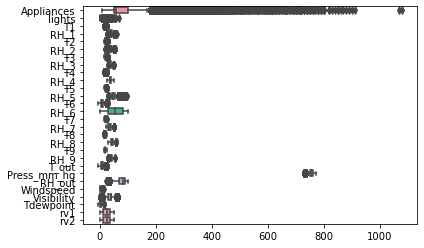

In [29]:
sns.boxplot(data = df1, orient = 'h')
plt.show()

### Затем, используя способ стандартизации, получим диаграмму количественных признаков после масштабирования:

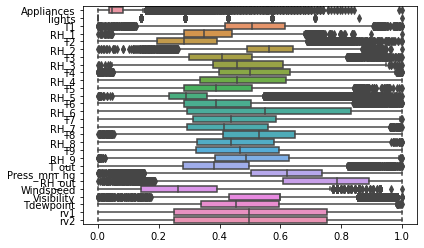

In [31]:
scal = preprocessing.MinMaxScaler()
df1[numer_columns] = scal.fit_transform(df[numer_columns])
sns.boxplot(data=df1[numer_columns], orient="h")
plt.show()

## 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены:

In [39]:
df2 = pd.read_csv('energydata_complete.csv')
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [38]:
categor = [c for c in df2.columns if df2[c].dtype.name == 'object']
num = [c for c in df2.columns if df2[c].dtype.name != 'object']
print (f"Столбцы с категориальными признаками: {categor}")
print (f"Столбцы с числовыми признаками: {num}")

Столбцы с категориальными признаками: ['date']
Столбцы с числовыми признаками: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [41]:
df2[categorical_columns].describe()

,date
count,19735
unique,19735
top,2016-05-24 17:20:00
freq,1


### Т.к общее количество значений равно количеству уникальных, то замена не требуется.

## 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других:

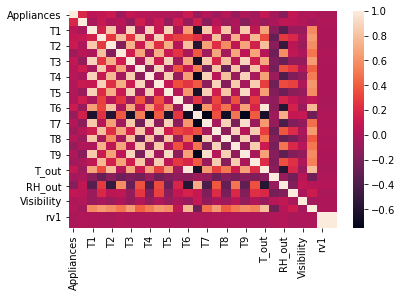

In [43]:
df3 = pd.read_csv('energydata_complete.csv')
corr = df3.corr()
sns.heatmap(corr)

## 6.	Заполните пропущенные значения в данных:

In [45]:
len(df)
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

### Пропущенные значения отсутсвуют

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

## Классификаторы:
### 1) Линейная регрессия без использования регуляризаторов;
### 2) Линейная регрессия, LASSO регуляризатор.


In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
warnings.simplefilter('ignore')

### 1) Линейная регрессия без использования регуляризаторов:

In [55]:
df = pd.read_csv('energydata_complete.csv')
df.drop(['date'], axis = 1, inplace=True)
data_x = df.drop(['T1'], axis = 1)
data_y = df['T1']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)
l_r = LinearRegression()
l_r.fit(X_train, y_train)
pred = l_r.predict(X_test)

print(pred[:10] - y_test[:10])

15563    0.164680
12564   -0.190457
10649    0.001718
16554   -0.275350
8130     0.219465
16981    0.049575
8164     0.041926
14583   -0.219754
18716   -0.297234
18643    0.047922
Name: T1, dtype: float64


In [57]:
person, pvalue = pearsonr(pred, y_test)
print("Вычислим коэфициент корреляции Пирсона.: ", person)
print("С учётом p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Вычислим коэфициент корреляции Спирмена: ", spermen)
print("С учётом p_value:", pvalue)

Корреляция Пирсона.:  0.9740871066440289
p_value: 0.0
Корреляция Спирмена:  0.9673201440003394
p_value: 0.0


### 2) Линейная регрессия, LASSO регуляризатор:

In [64]:
df = pd.read_csv('energydata_complete.csv')
las = Lasso()
parameters_las = {'alpha': np.linspace(1, 5, 25)}
grid_las = GridSearchCV(las, parameters_las) 
grid_las = grid_rid.fit(X_train, y_train)
alpha = grid_las.best_estimator_.alpha
las = Lasso(alpha = alpha)
las.fit(X_train, y_train)
pred = las.predict(X_test)
print(pred[:10] - y_test[:10])

15563    1.916180
12564    0.280482
10649   -0.351244
16554   -0.883820
8130     1.005977
16981   -2.050487
8164     1.535595
14583    0.161349
18716   -0.132561
18643   -1.079171
Name: T1, dtype: float64


In [65]:
person, pvalue = pearsonr(pred, y_test)
print("Вычислим коэфициент корреляции Пирсона.: ", person)
print("С учётом p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Вычислим коэфициент корреляции Спирмена: ", spermen)
print("С учётом p_value:", pvalue)

Вычислим коэфициент корреляции Пирсона.:  0.6136106732544492
С учётом p_value: 0.0
Вычислим коэфициент корреляции Спирмена:  0.5992737834827309
С учётом p_value: 0.0
